# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [6]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [7]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


614

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [8]:
test = cities[0]

In [9]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
City = []
lat = []
lng=[]
temp=[]
humid = []
cloudy=[]
windy=[]
country = []
date = []
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [10]:
print("Beginning Data Retrieval")
print("-----------------")
for city in cities:
    print(f'Processing Record for {city}')
    response = requests.get(query_url + city).json()
    try:
        City.append(response['name'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        temp.append(response['main']['temp_max'])
        humid.append(response['main']['humidity'])
        cloudy.append(response['clouds']['all'])
        windy.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
    except:
        print("City not found. Skipping...")

Beginning Data Retrieval
-----------------
Processing Record for port elizabeth
Processing Record for baglung
Processing Record for tasiilaq
Processing Record for bolungarvik
City not found. Skipping...
Processing Record for vaini
Processing Record for pevek
Processing Record for victoria
Processing Record for clyde river
Processing Record for ushuaia
Processing Record for bermeo
Processing Record for lubao
Processing Record for upernavik
Processing Record for kapaa
Processing Record for albany
Processing Record for coahuayana
Processing Record for rikitea
Processing Record for kalabo
Processing Record for tucumcari
Processing Record for tuktoyaktuk
Processing Record for tomatlan
Processing Record for zlatoustovsk
City not found. Skipping...
Processing Record for laguna
Processing Record for ostrovnoy
Processing Record for thompson
Processing Record for butaritari
Processing Record for bredasdorp
Processing Record for salinas
Processing Record for mataura
Processing Record for katsuura

Processing Record for kralendijk
Processing Record for louisbourg
City not found. Skipping...
Processing Record for nyurba
Processing Record for bethel
Processing Record for souillac
Processing Record for washim
Processing Record for yerbogachen
Processing Record for camana
Processing Record for buala
Processing Record for shahr-e kord
Processing Record for visnes
Processing Record for arraial do cabo
Processing Record for fevralsk
City not found. Skipping...
Processing Record for san quintin
Processing Record for iskateley
Processing Record for lazaro cardenas
Processing Record for wattegama
Processing Record for kudahuvadhoo
Processing Record for quang ngai
Processing Record for nicoya
Processing Record for sorland
Processing Record for tumaco
Processing Record for mishkino
Processing Record for zhigansk
Processing Record for samarai
Processing Record for barrow
Processing Record for lompoc
Processing Record for unity
Processing Record for muzhi
Processing Record for vanavara
Process

Processing Record for havoysund
Processing Record for quepos
Processing Record for port blair
Processing Record for itaquitinga
Processing Record for shache
Processing Record for antioch
Processing Record for magdalena
Processing Record for sangar
Processing Record for jhol
Processing Record for zhengjiatun
Processing Record for ajdabiya
Processing Record for krasnoselkup
Processing Record for vestbygda
City not found. Skipping...
Processing Record for alyangula
Processing Record for biharamulo
Processing Record for consdorf
Processing Record for shelburne
Processing Record for kabompo
Processing Record for sisian
Processing Record for skibbereen
Processing Record for rio gallegos
Processing Record for jiddah
City not found. Skipping...
Processing Record for rawson
Processing Record for arona
Processing Record for boyolangu
Processing Record for sambava
Processing Record for paracuru
Processing Record for panaba
Processing Record for tecoanapa
Processing Record for mulchen
Processing R

In [12]:
dict = {"City" : City,"Lat": lat, "Lng" : lng, "Max Temp" : temp, "Humidity" : humid, "Cloudiness": cloudy, "Wind Speed": windy, "Country": country, "Date": date}

In [25]:
cities_df = pd.DataFrame(dict)

In [26]:
cities_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Port Elizabeth,-33.9180,25.5701,23.00,83,75,8.23,ZA,1612366424
1,Bāglung,28.2719,83.5898,9.86,49,16,2.33,NP,1612366323
2,Tasiilaq,65.6145,-37.6368,-2.36,97,100,9.48,GL,1612366424
3,Vaini,-21.2000,-175.2000,25.00,94,75,2.74,TO,1612366425
4,Pevek,69.7008,170.3133,-22.17,76,58,3.61,RU,1612366425
...,...,...,...,...,...,...,...,...,...
565,Camacha,33.0833,-16.3333,18.00,72,75,6.17,PT,1612366489
566,Hirara,24.8000,125.2833,18.73,65,29,6.27,JP,1612366489
567,Namanyere,-7.5167,31.0500,19.46,90,97,0.82,TZ,1612366337
568,Kloulklubed,7.0419,134.2556,27.00,83,75,3.09,PW,1612366490


In [27]:
cities_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570 entries, 0 to 569
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        570 non-null    object 
 1   Lat         570 non-null    float64
 2   Lng         570 non-null    float64
 3   Max Temp    570 non-null    float64
 4   Humidity    570 non-null    int64  
 5   Cloudiness  570 non-null    int64  
 6   Wind Speed  570 non-null    float64
 7   Country     570 non-null    object 
 8   Date        570 non-null    int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 40.2+ KB


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [28]:
cities_df.to_csv("Cities_Data.csv", encoding="utf-8", index=False)

In [33]:
cities_df['Date'] = cities_df.time
cities_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Port Elizabeth,-33.9180,25.5701,23.00,83,75,8.23,ZA,1612366424
1,Bāglung,28.2719,83.5898,9.86,49,16,2.33,NP,1612366323
2,Tasiilaq,65.6145,-37.6368,-2.36,97,100,9.48,GL,1612366424
3,Vaini,-21.2000,-175.2000,25.00,94,75,2.74,TO,1612366425
4,Pevek,69.7008,170.3133,-22.17,76,58,3.61,RU,1612366425


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [ ]:
cities_df.loc[cities_df['Humidity'] > 100]

There are no cities with humidity above 100%

In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

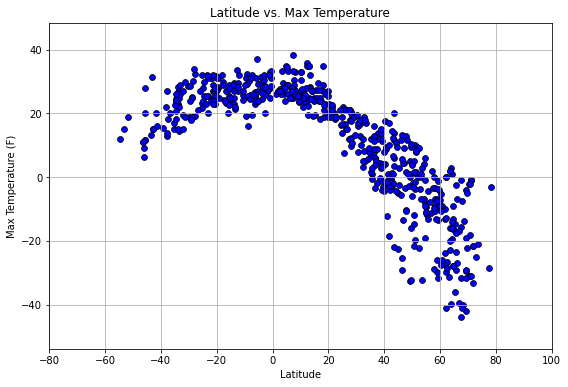

In [110]:
cities_df.head()
x = cities_df.Lat
y = cities_df['Max Temp']

plt.figure(figsize=(9,6))

# Plot the lat vs the max temp
plt.scatter(x, y,linewidths = 0.75, edgecolors = 'black', color = 'blue', s=35)

plt.title(f"Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()

# Modify ticks
plt.xlim(-80,100)
plt.ylim(min(cities_df['Max Temp'] - 10), max(cities_df['Max Temp'] + 10))


#plt.show()
plt.savefig("Lat vs Temp")

## Latitude vs. Humidity Plot

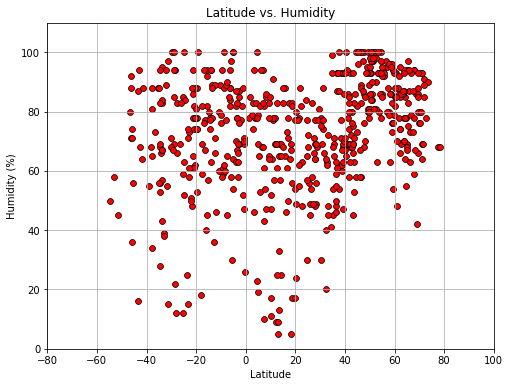

In [111]:
cities_df.head()
x = cities_df.Lat
y = cities_df.Humidity

plt.figure(figsize=(8,6))

# Plot the lat vs the max temp
plt.scatter(x, y,linewidths = 0.75, edgecolors = 'black', color = 'red', s=35)


plt.title(f"Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# Modify ticks
plt.xlim(-80,100)
plt.ylim(0,110)

plt.savefig("Lat vs Humidity")
#plt.show()

## Latitude vs. Cloudiness Plot

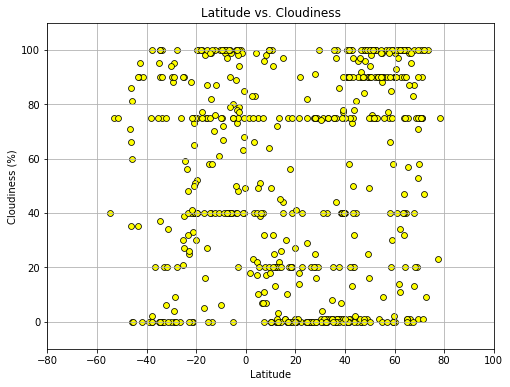

In [112]:
x = cities_df.Lat
y = cities_df.Cloudiness

plt.figure(figsize=(8,6))

# Plot the lat vs the max temp
plt.scatter(x, y,linewidths = 0.75, edgecolors = 'black', color = 'yellow', s=35)


plt.title(f"Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Modify ticks
plt.xlim(-80,100)
plt.ylim(-10,110)


#plt.show()
plt.savefig("Lat vs Cloudiness")

## Latitude vs. Wind Speed Plot

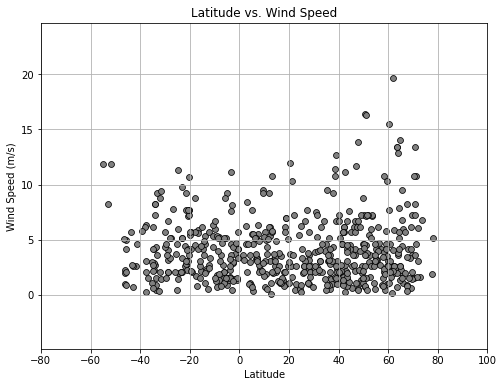

In [113]:
x = cities_df.Lat
y = cities_df['Wind Speed']

plt.figure(figsize=(8,6))

# Plot the lat vs the max temp
plt.scatter(x, y,linewidths = 0.75, edgecolors = 'black', color = 'grey', s=35)


plt.title(f"Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid()

# Modify ticks
plt.xlim(-80,100)
plt.ylim(min(cities_df['Wind Speed']) - 5, max(cities_df['Wind Speed'] + 5))


#plt.show()
plt.savefig("Lat vs Wind Speed")

## Linear Regression

In [74]:
northern_hemisphere = cities_df.loc[cities_df['Lat'] >= 0]
southern_hemisphere = cities_df.loc[cities_df['Lat'] < 0]

In [75]:
northern_hemisphere.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 382 entries, 1 to 568
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        382 non-null    object 
 1   Lat         382 non-null    float64
 2   Lng         382 non-null    float64
 3   Max Temp    382 non-null    float64
 4   Humidity    382 non-null    int64  
 5   Cloudiness  382 non-null    int64  
 6   Wind Speed  382 non-null    float64
 7   Country     382 non-null    object 
 8   Date        382 non-null    int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 29.8+ KB


In [76]:
southern_hemishphere.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 188 entries, 0 to 569
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        188 non-null    object 
 1   Lat         188 non-null    float64
 2   Lng         188 non-null    float64
 3   Max Temp    188 non-null    float64
 4   Humidity    188 non-null    int64  
 5   Cloudiness  188 non-null    int64  
 6   Wind Speed  188 non-null    float64
 7   Country     188 non-null    object 
 8   Date        188 non-null    int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 14.7+ KB


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

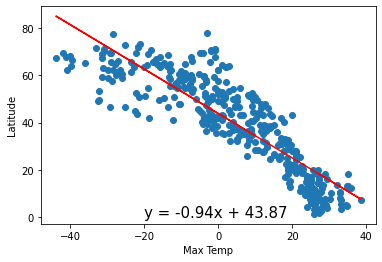

In [114]:
x = northern_hemisphere['Max Temp']
y = northern_hemisphere['Lat']
(slope, intercept, r, p, se) = linregress(northern_hemisphere['Max Temp'], northern_hemisphere['Lat'])
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(-20,0),fontsize=15,color="black")
plt.xlabel('Max Temp')
plt.ylabel('Latitude')
plt.savefig("North Temp vs Lat")
#plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

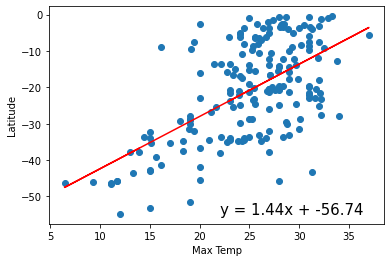

In [115]:
x = southern_hemisphere['Max Temp']
y = southern_hemisphere['Lat']
(slope, intercept, r, p, se) = linregress(southern_hemisphere['Max Temp'], southern_hemisphere['Lat'])
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(22,-55),fontsize=15,color="black")
plt.xlabel('Max Temp')
plt.ylabel('Latitude')
plt.savefig("South Temp vs Lat")
#plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

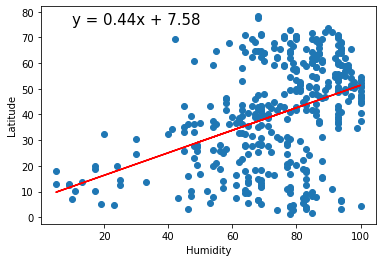

In [116]:
x = northern_hemisphere['Humidity']
y = northern_hemisphere['Lat']
(slope, intercept, r, p, se) = linregress(northern_hemisphere['Humidity'], northern_hemisphere['Lat'])
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(10,75),fontsize=15,color="black")
plt.xlabel('Humidity')
plt.ylabel('Latitude')
#plt.show()
plt.savefig("North Humidity vs Lat")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

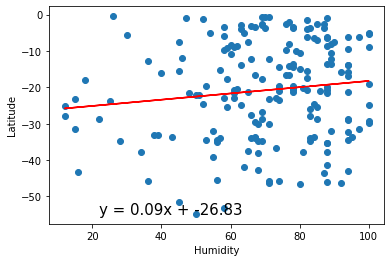

In [117]:
x = southern_hemisphere['Humidity']
y = southern_hemisphere['Lat']
(slope, intercept, r, p, se) = linregress(southern_hemisphere['Humidity'], southern_hemisphere['Lat'])
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(22,-55),fontsize=15,color="black")
plt.xlabel('Humidity')
plt.ylabel('Latitude')
#plt.show()
plt.savefig("South Humidity vs Lat")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

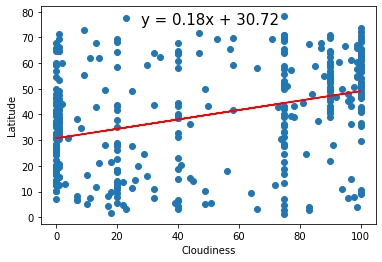

In [118]:
x = northern_hemisphere['Cloudiness']
y = northern_hemisphere['Lat']
(slope, intercept, r, p, se) = linregress(northern_hemisphere['Cloudiness'], northern_hemisphere['Lat'])
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(28,75),fontsize=15,color="black")
plt.xlabel('Cloudiness')
plt.ylabel('Latitude')
#plt.show()
plt.savefig("North Cloudiness vs Lat")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

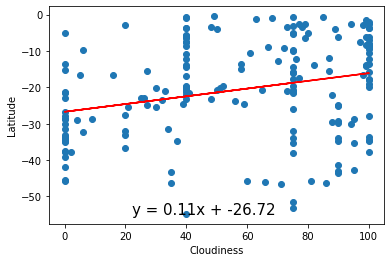

In [119]:
x = southern_hemisphere['Cloudiness']
y = southern_hemisphere['Lat']
(slope, intercept, r, p, se) = linregress(southern_hemisphere['Cloudiness'], southern_hemisphere['Lat'])
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(22,-55),fontsize=15,color="black")
plt.xlabel('Cloudiness')
plt.ylabel('Latitude')
#plt.show()
plt.savefig("South Cloudiness vs Lat")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

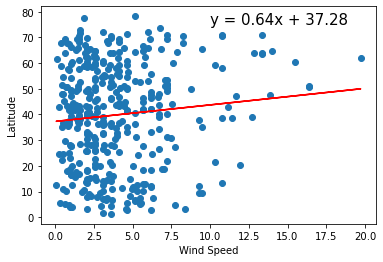

In [120]:
x = northern_hemisphere['Wind Speed']
y = northern_hemisphere['Lat']
(slope, intercept, r, p, se) = linregress(northern_hemisphere['Wind Speed'], northern_hemisphere['Lat'])
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(10,75),fontsize=15,color="black")
plt.xlabel('Wind Speed')
plt.ylabel('Latitude')
#plt.shWind Speed
plt.savefig("North Wind Speed vs Lat")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

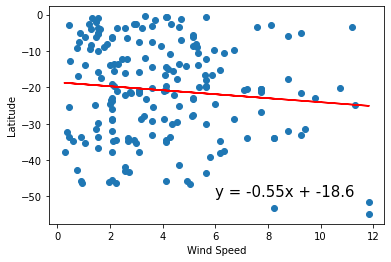

In [121]:
x = southern_hemisphere['Wind Speed']
y = southern_hemisphere['Lat']
(slope, intercept, r, p, se) = linregress(southern_hemisphere['Wind Speed'], southern_hemisphere['Lat'])
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(6,-50),fontsize=15,color="black")
plt.xlabel('Wind Speed')
plt.ylabel('Latitude')
#plt.show()
plt.savefig("South Wind Speed vs Lat")